# StaySharp Eye Detection

## Set up the Environment

### Importing Requirements

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

import zipfile

### Download Dataset

In [ ]:
! pip install kaggle

### Extract and Download the dataset

In [ ]:
! kaggle datasets download prasadvpatil/mrl-dataset

Dataset URL: https://www.kaggle.com/datasets/prasadvpatil/mrl-dataset
License(s): CC0-1.0
 89% 20.0M/22.6M [00:02<00:00, 13.0MB/s]
100% 22.6M/22.6M [00:02<00:00, 10.7MB/s]


In [ ]:
with zipfile.ZipFile('mrl-dataset.zip','r') as zip_ref:
  zip_ref.extractall('/content/')

In [ ]:
PATH = '/content/train'

X = []
Y = []

for i in tqdm(glob(PATH+'/Open_Eyes/*')):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(1)

for i in tqdm(glob(PATH+'/Closed_Eyes/*')):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(0)

100%|██████████| 2000/2000 [00:02<00:00, 810.65it/s]


### Augmenting and Splitting the dataset

In [ ]:
X = np.array(X)
X = X/255.0
Y = np.array(Y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True)

print("Training data size (x_train):", len(x_train))
print("Training labels size (y_train):", len(y_train))
print("Test data size (x_test):", len(x_test))
print("Test labels size (y_test):", len(y_test))

Training data size (x_train): 3000
Training labels size (y_train): 3000
Test data size (x_test): 1000
Test labels size (y_test): 1000


## Creating Model

In [ ]:
model = tf.keras.models.Sequential([
    # Rescale images & Input shape
    tf.keras.Input(shape=(64,64,1)),

    # Augmentation Layers
    # tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1, fill_mode="nearest"),
    tf.keras.layers.RandomTranslation(0.2 , 0.2, fill_mode="nearest"),
    tf.keras.layers.RandomZoom(0.2,fill_mode='nearest'),
    # tf.keras.layers.RandomBrightness(0.3),

    tf.keras.layers.Conv2D(32,3,activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3,activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3,activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128,3,activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),

    # Dense Layers

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_rotation (RandomRotation)     │ (None, 64, 64, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_translation                   │ (None, 64, 64, 1)           │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (None, 64, 64, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 195,393 (763.25 KB)

 Trainable params: 195,393 (763.25 KB)

 Non-trainable params: 0 (0.00 B)

### Setting Up Callbacks

In [ ]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self,epoch,logs=None):

        if logs.get('accuracy') >= 0.99 and logs.get('val_accuracy') >= 0.99:
            self.model.stop_training = True

            print("\nReached 90% train accuracy and 90% validation accuracy, so cancelling training!")

### Fit Model

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs = 30,
    batch_size = 32,
    validation_data = (x_test, y_test),
    verbose = 1,
    callbacks = [EarlyStoppingCallback()]
)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 31s 266ms/step - accuracy: 0.6925 - loss: 0.5536 - val_accuracy: 0.8450 - val_loss: 0.2624
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 37s 229ms/step - accuracy: 0.8554 - loss: 0.3090 - val_accuracy: 0.9150 - val_loss: 0.1667
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 39s 207ms/step - accuracy: 0.9002 - loss: 0.2315 - val_accuracy: 0.9410 - val_loss: 0.1456
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.9113 - loss: 0.2130 - val_accuracy: 0.9850 - val_loss: 0.0658
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - accuracy: 0.9425 - loss: 0.1390 - val_accuracy: 0.9960 - val_loss: 0.0514
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - accuracy: 0.9594 - loss: 0.1133 - val_accuracy: 0.9920 - val_loss: 0.0418
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 208ms/step - accuracy: 0.9708 - loss: 0.0865 - val_accuracy: 0.9910 - val_loss: 0.0307
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 194ms/step - accuracy: 0.9676 - loss: 0.0892 - val_accu

### Evaluate the Model

In [ ]:
model.evaluate(x_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9994 - loss: 0.0024


[0.004846812691539526, 0.9980000257492065]

### Visualization

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


Text(0.5, 25.722222222222214, 'Actual')

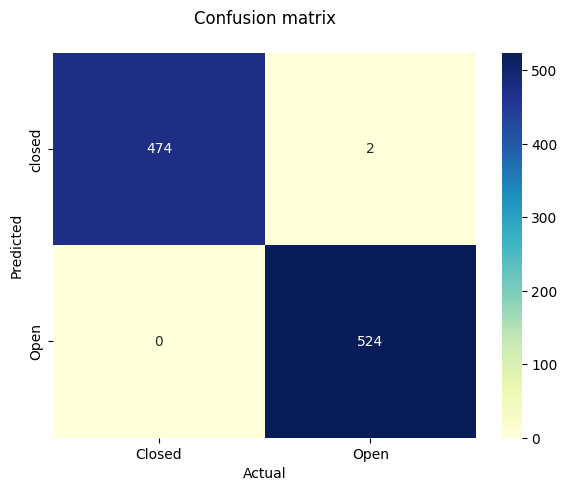

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

## Export as TFLite Model

In [ ]:
import pickle
model.save('/content/StayAwake.keras')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the Keras model
model = load_model('/content/StayAwake.keras')

In [ ]:
import tensorflow as tf

# Convert the Keras model to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpv46i7uvf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136863792832832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136863792829664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136863792838816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136863792839520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136863792930608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136863792922688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136863792936416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136863792937120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136864065216128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136864065217008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136864065220704: 

In [ ]:
# Save the TensorFlow Lite model to a .tflite file
with open('/content/StayAwake.tflite', 'wb') as f:
    f.write(tflite_model)